# 3. Dashboard

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from IPython.display import Image
from dash import Dash, html, dcc, callback, Output, Input

# Reading in the Data

In [2]:
shooting_incidents = pd.read_csv('../data/shooting_incidents.csv')
shooting_incidents.insert(3, 'year', pd.DatetimeIndex(shooting_incidents['date']).year)
shooting_incidents.head()

,Unnamed: 0,incident_id,date,year,city,county,state,num_offenders,num_victims_killed,num_victims_injured,...,ak_47_pattern,ar_15_pattern,type,situation_type,location_type,location,gis_code,longitude,latitude,narrative
0,45,543,2022-11-22,2022,Chesapeake,Chesapeake city,VA,1,6,6,...,False,False,Public,NaN,Commercial/Retail/Entertainment,Commercial/Retail,5.155002e+10,-76.25506,36.70788,"A gunman, an employee of the Chesapeake Walmar..."
1,46,541,2022-11-20,2022,Colorado Springs,El Paso County,CO,1,5,17,...,False,False,Public,Hate,Commercial/Retail/Entertainment,Bar/Club/Restaurant,8.041000e+09,-104.75820,38.88104,Five people were killed and 25 injured at an L...
2,47,542,2022-11-20,2022,Hennessey,Kingfisher County,OK,1,4,1,...,False,False,Other,NaN,Commercial/Retail/Entertainment,Commercial/Retail,4.007396e+10,-98.09125,36.14123,Deputies responding to reports of a hostage si...
3,48,540,2022-11-18,2022,Richmond,Chesterfield County,VA,1,4,0,...,False,False,Family,NaN,Residence/Other shelter,Residence,5.104110e+10,-77.46759,37.39593,A woman and her three children were fatally sh...
4,51,536,2022-11-04,2022,La Plata,Charles County,MD,1,4,0,...,False,False,Family,NaN,Residence/Other shelter,Residence,2.401785e+10,-76.95524,38.53813,"Responding to a 911 call about a shooting, the..."


# Mass Shootings by State
# 2017

In [3]:
state_incidents_2017 = shooting_incidents[shooting_incidents['year'] == 2017]
state_incidents_2017 = state_incidents_2017.groupby(['state']).count()
state_incidents_2017 = pd.DataFrame(state_incidents_2017['incident_id'])
state_incidents_2017 = state_incidents_2017.rename(columns={'incident_id': '2017'})
state_incidents_2017.head()

,2017
state,
AZ,1
CA,1
FL,2
IL,2
LA,1


In [4]:
states = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
          'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 
          'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 
          'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
          'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
states = pd.Series(states)

missing_states = pd.DataFrame(states[~states.isin(state_incidents_2017.index)])
missing_states['2017'] = [0] * 34
missing_states.set_index(0, inplace=True)

state_incidents_2017 = pd.concat([state_incidents_2017, missing_states])
state_incidents_2017.count()

2017    50
dtype: int64

# 2018

In [5]:
state_incidents_2018 = shooting_incidents[shooting_incidents['year'] == 2018]
state_incidents_2018 = state_incidents_2018.groupby(['state']).count()
state_incidents_2018 = pd.DataFrame(state_incidents_2018['incident_id'])
state_incidents_2018 = state_incidents_2018.rename(columns={'incident_id': '2018'})
state_incidents_2018.head()

,2018
state,
AZ,1
CA,2
DE,1
FL,2
KY,1


In [6]:
missing_states = pd.DataFrame(states[~states.isin(state_incidents_2018.index)])
missing_states['2018'] = [0] * 38
missing_states.set_index(0, inplace=True)

state_incidents_2018 = pd.concat([state_incidents_2018, missing_states])
state_incidents_2018.count()

2018    50
dtype: int64

# 2019

In [7]:
state_incidents_2019 = shooting_incidents[shooting_incidents['year'] == 2019]
state_incidents_2019 = state_incidents_2019.groupby(['state']).count()
state_incidents_2019 = pd.DataFrame(state_incidents_2019['incident_id'])
state_incidents_2019 = state_incidents_2019.rename(columns={'incident_id': '2019'})
state_incidents_2019.head()

,2019
state,
AL,1
AZ,1
CA,7
FL,1
GA,1


In [8]:
missing_states = pd.DataFrame(states[~states.isin(state_incidents_2019.index)])
missing_states['2019'] = [0] * 30
missing_states.set_index(0, inplace=True)

state_incidents_2019 = pd.concat([state_incidents_2019, missing_states])
state_incidents_2019.count()

2019    50
dtype: int64

# 2020

In [9]:
state_incidents_2020 = shooting_incidents[shooting_incidents['year'] == 2020]
state_incidents_2020 = state_incidents_2020.groupby(['state']).count()
state_incidents_2020 = pd.DataFrame(state_incidents_2020['incident_id'])
state_incidents_2020 = state_incidents_2020.rename(columns={'incident_id': '2020'})
state_incidents_2020.head()

,2020
state,
AK,1
AL,1
AR,1
CA,1
IL,1


In [10]:
missing_states = pd.DataFrame(states[~states.isin(state_incidents_2020.index)])
missing_states['2020'] = [0] * 34
missing_states.set_index(0, inplace=True)

state_incidents_2020 = pd.concat([state_incidents_2020, missing_states])
state_incidents_2020.count()

2020    50
dtype: int64

# 2021

In [11]:
state_incidents_2021 = shooting_incidents[shooting_incidents['year'] == 2021]
state_incidents_2021 = state_incidents_2021.groupby(['state']).count()
state_incidents_2021 = pd.DataFrame(state_incidents_2021['incident_id'])
state_incidents_2021 = state_incidents_2021.rename(columns={'incident_id': '2021'})
state_incidents_2021.head()

,2021
state,
AZ,1
CA,4
CO,3
FL,1
GA,1


In [12]:
missing_states = pd.DataFrame(states[~states.isin(state_incidents_2021.index)])
missing_states['2021'] = [0] * 31
missing_states.set_index(0, inplace=True)

state_incidents_2021 = pd.concat([state_incidents_2021, missing_states])
state_incidents_2021.count()

2021    50
dtype: int64

# 2022

In [13]:
state_incidents_2022 = shooting_incidents[shooting_incidents['year'] == 2022]
state_incidents_2022 = state_incidents_2022.groupby(['state']).count()
state_incidents_2022 = pd.DataFrame(state_incidents_2022['incident_id'])
state_incidents_2022 = state_incidents_2022.rename(columns={'incident_id': '2022'})
state_incidents_2022.head()

,2022
state,
AR,1
CA,4
CO,2
FL,2
IL,1


In [14]:
missing_states = pd.DataFrame(states[~states.isin(state_incidents_2022.index)])
missing_states['2022'] = [0] * 32
missing_states.set_index(0, inplace=True)

state_incidents_2022 = pd.concat([state_incidents_2022, missing_states])
state_incidents_2022.count()

2022    50
dtype: int64

# 2017-2022

In [15]:
state_incidents = pd.concat([state_incidents_2017, state_incidents_2018, state_incidents_2019, 
                             state_incidents_2020, state_incidents_2021, state_incidents_2022], axis=1)
state_incidents['2017-2022'] = state_incidents.sum(axis=1)
state_incidents.head()

,2017,2018,2019,2020,2021,2022,2017-2022
AZ,1,1,1,0,1,0,4
CA,1,2,7,1,4,4,19
FL,2,2,1,0,1,2,8
IL,2,0,2,1,2,1,8
LA,1,0,1,1,0,0,3


# Number of Mass Shootings by State (2017-2022)

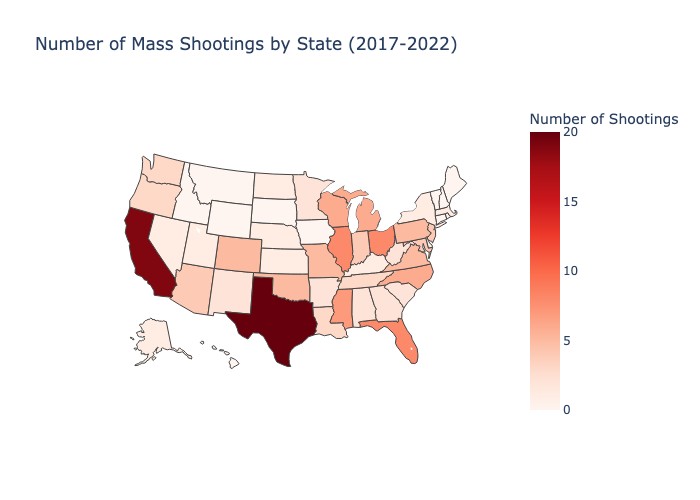

In [16]:
state_incidents_fig = go.Figure(data=go.Choropleth(locations=state_incidents.index, 
                                                   z=state_incidents['2017-2022'], 
                                                   locationmode='USA-states', 
                                                   colorscale='Reds',
                                                   colorbar_title='Number of Shootings'))

state_incidents_fig.update_layout(title_text='Number of Mass Shootings by State (2017-2022)', 
                                  geo_scope='usa')

img_bytes = state_incidents_fig.to_image(format='png')
Image(img_bytes)

# Shooting Victims by State
# 2017

In [17]:
# total
state_victims_2017 = shooting_incidents[shooting_incidents['year'] == 2017]
state_victims_2017 = state_victims_2017.groupby(['state']).count()
state_victims_2017 = pd.DataFrame(state_victims_2017[['num_victims_killed', 'num_victims_injured']])
state_victims_2017['2017'] = state_victims_2017.sum(axis=1)
state_victims_2017 = state_victims_2017.drop(columns=['num_victims_killed', 'num_victims_injured'])

# killed
victims_killed_2017 = shooting_incidents[shooting_incidents['year'] == 2017]
victims_killed_2017 = victims_killed_2017.groupby(['state']).count()
victims_killed_2017 = pd.DataFrame(victims_killed_2017['num_victims_killed'])
victims_killed_2017 = victims_killed_2017.rename(columns={'num_victims_killed': '2017'})

# injured
victims_injured_2017 = shooting_incidents[shooting_incidents['year'] == 2017]
victims_injured_2017 = victims_injured_2017.groupby(['state']).count()
victims_injured_2017 = pd.DataFrame(victims_injured_2017['num_victims_injured'])
victims_injured_2017 = victims_injured_2017.rename(columns={'num_victims_injured': '2017'})

In [18]:
# total
missing_states = pd.DataFrame(states[~states.isin(state_victims_2017.index)])
missing_states['2017'] = [0] * 34
missing_states.set_index(0, inplace=True)
state_victims_2017 = pd.concat([state_victims_2017, missing_states])

# killed
missing_states = pd.DataFrame(states[~states.isin(victims_killed_2017.index)])
missing_states['2017'] = [0] * 34
missing_states.set_index(0, inplace=True)
victims_killed_2017 = pd.concat([victims_killed_2017, missing_states])

# injured
missing_states = pd.DataFrame(states[~states.isin(victims_injured_2017.index)])
missing_states['2017'] = [0] * 34
missing_states.set_index(0, inplace=True)
victims_injured_2017 = pd.concat([victims_injured_2017, missing_states])

# 2018

In [19]:
# total
state_victims_2018 = shooting_incidents[shooting_incidents['year'] == 2018]
state_victims_2018 = state_victims_2018.groupby(['state']).count()
state_victims_2018 = pd.DataFrame(state_victims_2018[['num_victims_killed', 'num_victims_injured']])
state_victims_2018['2018'] = state_victims_2018.sum(axis=1)
state_victims_2018 = state_victims_2018.drop(columns=['num_victims_killed', 'num_victims_injured'])

# killed
victims_killed_2018 = shooting_incidents[shooting_incidents['year'] == 2018]
victims_killed_2018 = victims_killed_2018.groupby(['state']).count()
victims_killed_2018 = pd.DataFrame(victims_killed_2018['num_victims_killed'])
victims_killed_2018 = victims_killed_2018.rename(columns={'num_victims_killed': '2018'})

# injured
victims_injured_2018 = shooting_incidents[shooting_incidents['year'] == 2018]
victims_injured_2018 = victims_injured_2018.groupby(['state']).count()
victims_injured_2018 = pd.DataFrame(victims_injured_2018['num_victims_injured'])
victims_injured_2018 = victims_injured_2018.rename(columns={'num_victims_injured': '2018'})

In [20]:
# total
missing_states = pd.DataFrame(states[~states.isin(state_victims_2018.index)])
missing_states['2018'] = [0] * 38
missing_states.set_index(0, inplace=True)
state_victims_2018 = pd.concat([state_victims_2018, missing_states])

# killed
missing_states = pd.DataFrame(states[~states.isin(victims_killed_2018.index)])
missing_states['2018'] = [0] * 38
missing_states.set_index(0, inplace=True)
victims_killed_2018 = pd.concat([victims_killed_2018, missing_states])

# injured
missing_states = pd.DataFrame(states[~states.isin(victims_injured_2018.index)])
missing_states['2018'] = [0] * 38
missing_states.set_index(0, inplace=True)
victims_injured_2018 = pd.concat([victims_injured_2018, missing_states])

# 2019

In [21]:
# total
state_victims_2019 = shooting_incidents[shooting_incidents['year'] == 2019]
state_victims_2019 = state_victims_2019.groupby(['state']).count()
state_victims_2019 = pd.DataFrame(state_victims_2019[['num_victims_killed', 'num_victims_injured']])
state_victims_2019['2019'] = state_victims_2019.sum(axis=1)
state_victims_2019 = state_victims_2019.drop(columns=['num_victims_killed', 'num_victims_injured'])

# killed
victims_killed_2019 = shooting_incidents[shooting_incidents['year'] == 2019]
victims_killed_2019 = victims_killed_2019.groupby(['state']).count()
victims_killed_2019 = pd.DataFrame(victims_killed_2019['num_victims_killed'])
victims_killed_2019 = victims_killed_2019.rename(columns={'num_victims_killed': '2019'})

# injured
victims_injured_2019 = shooting_incidents[shooting_incidents['year'] == 2019]
victims_injured_2019 = victims_injured_2019.groupby(['state']).count()
victims_injured_2019 = pd.DataFrame(victims_injured_2019['num_victims_injured'])
victims_injured_2019 = victims_injured_2019.rename(columns={'num_victims_injured': '2019'})

In [22]:
# total
missing_states = pd.DataFrame(states[~states.isin(state_victims_2019.index)])
missing_states['2019'] = [0] * 30
missing_states.set_index(0, inplace=True)
state_victims_2019 = pd.concat([state_victims_2019, missing_states])

# killed
missing_states = pd.DataFrame(states[~states.isin(victims_killed_2019.index)])
missing_states['2019'] = [0] * 30
missing_states.set_index(0, inplace=True)
victims_killed_2019 = pd.concat([victims_killed_2019, missing_states])

# injured
missing_states = pd.DataFrame(states[~states.isin(victims_injured_2019.index)])
missing_states['2019'] = [0] * 30
missing_states.set_index(0, inplace=True)
victims_injured_2019 = pd.concat([victims_injured_2019, missing_states])

# 2020

In [23]:
# total
state_victims_2020 = shooting_incidents[shooting_incidents['year'] == 2020]
state_victims_2020 = state_victims_2020.groupby(['state']).count()
state_victims_2020 = pd.DataFrame(state_victims_2020[['num_victims_killed', 'num_victims_injured']])
state_victims_2020['2020'] = state_victims_2020.sum(axis=1)
state_victims_2020 = state_victims_2020.drop(columns=['num_victims_killed', 'num_victims_injured'])

# killed
victims_killed_2020 = shooting_incidents[shooting_incidents['year'] == 2020]
victims_killed_2020 = victims_killed_2020.groupby(['state']).count()
victims_killed_2020 = pd.DataFrame(victims_killed_2020['num_victims_killed'])
victims_killed_2020 = victims_killed_2020.rename(columns={'num_victims_killed': '2020'})

# injured
victims_injured_2020 = shooting_incidents[shooting_incidents['year'] == 2020]
victims_injured_2020 = victims_injured_2020.groupby(['state']).count()
victims_injured_2020 = pd.DataFrame(victims_injured_2020['num_victims_injured'])
victims_injured_2020 = victims_injured_2020.rename(columns={'num_victims_injured': '2020'})

In [24]:
# total
missing_states = pd.DataFrame(states[~states.isin(state_victims_2020.index)])
missing_states['2020'] = [0] * 34
missing_states.set_index(0, inplace=True)
state_victims_2020 = pd.concat([state_victims_2020, missing_states])

# killed
missing_states = pd.DataFrame(states[~states.isin(victims_killed_2020.index)])
missing_states['2020'] = [0] * 34
missing_states.set_index(0, inplace=True)
victims_killed_2020 = pd.concat([victims_killed_2020, missing_states])

# injured
missing_states = pd.DataFrame(states[~states.isin(victims_injured_2020.index)])
missing_states['2020'] = [0] * 34
missing_states.set_index(0, inplace=True)
victims_injured_2020 = pd.concat([victims_injured_2020, missing_states])

# 2021

In [25]:
# total
state_victims_2021 = shooting_incidents[shooting_incidents['year'] == 2021]
state_victims_2021 = state_victims_2021.groupby(['state']).count()
state_victims_2021 = pd.DataFrame(state_victims_2021[['num_victims_killed', 'num_victims_injured']])
state_victims_2021['2021'] = state_victims_2021.sum(axis=1)
state_victims_2021 = state_victims_2021.drop(columns=['num_victims_killed', 'num_victims_injured'])

# killed
victims_killed_2021 = shooting_incidents[shooting_incidents['year'] == 2021]
victims_killed_2021 = victims_killed_2021.groupby(['state']).count()
victims_killed_2021 = pd.DataFrame(victims_killed_2021['num_victims_killed'])
victims_killed_2021 = victims_killed_2021.rename(columns={'num_victims_killed': '2021'})

# injured
victims_injured_2021 = shooting_incidents[shooting_incidents['year'] == 2021]
victims_injured_2021 = victims_injured_2021.groupby(['state']).count()
victims_injured_2021 = pd.DataFrame(victims_injured_2021['num_victims_injured'])
victims_injured_2021 = victims_injured_2021.rename(columns={'num_victims_injured': '2021'})

In [26]:
# total
missing_states = pd.DataFrame(states[~states.isin(state_victims_2021.index)])
missing_states['2021'] = [0] * 31
missing_states.set_index(0, inplace=True)
state_victims_2021 = pd.concat([state_victims_2021, missing_states])

# killed
missing_states = pd.DataFrame(states[~states.isin(victims_killed_2021.index)])
missing_states['2021'] = [0] * 31
missing_states.set_index(0, inplace=True)
victims_killed_2021 = pd.concat([victims_killed_2021, missing_states])

# injured
missing_states = pd.DataFrame(states[~states.isin(victims_injured_2021.index)])
missing_states['2021'] = [0] * 31
missing_states.set_index(0, inplace=True)
victims_injured_2021 = pd.concat([victims_injured_2021, missing_states])

# 2022

In [27]:
# total
state_victims_2022 = shooting_incidents[shooting_incidents['year'] == 2022]
state_victims_2022 = state_victims_2022.groupby(['state']).count()
state_victims_2022 = pd.DataFrame(state_victims_2022[['num_victims_killed', 'num_victims_injured']])
state_victims_2022['2022'] = state_victims_2022.sum(axis=1)
state_victims_2022 = state_victims_2022.drop(columns=['num_victims_killed', 'num_victims_injured'])

# killed
victims_killed_2022 = shooting_incidents[shooting_incidents['year'] == 2022]
victims_killed_2022 = victims_killed_2022.groupby(['state']).count()
victims_killed_2022 = pd.DataFrame(victims_killed_2022['num_victims_killed'])
victims_killed_2022 = victims_killed_2022.rename(columns={'num_victims_killed': '2022'})

# injured
victims_injured_2022 = shooting_incidents[shooting_incidents['year'] == 2022]
victims_injured_2022 = victims_injured_2022.groupby(['state']).count()
victims_injured_2022 = pd.DataFrame(victims_injured_2022['num_victims_injured'])
victims_injured_2022 = victims_injured_2022.rename(columns={'num_victims_injured': '2022'})

In [28]:
# total
missing_states = pd.DataFrame(states[~states.isin(state_victims_2022.index)])
missing_states['2022'] = [0] * 32
missing_states.set_index(0, inplace=True)
state_victims_2022 = pd.concat([state_victims_2022, missing_states])

# killed
missing_states = pd.DataFrame(states[~states.isin(victims_killed_2022.index)])
missing_states['2022'] = [0] * 32
missing_states.set_index(0, inplace=True)
victims_killed_2022 = pd.concat([victims_killed_2022, missing_states])

# injured
missing_states = pd.DataFrame(states[~states.isin(victims_injured_2022.index)])
missing_states['2022'] = [0] * 32
missing_states.set_index(0, inplace=True)
victims_injured_2022 = pd.concat([victims_injured_2022, missing_states])

# 2017-2022

In [29]:
# total
state_victims = pd.concat([state_victims_2017, state_victims_2018, state_victims_2019, 
                           state_victims_2020, state_victims_2021, state_victims_2022], axis=1)
state_victims['2017-2022'] = state_victims.sum(axis=1)

# killed
victims_killed = pd.concat([victims_killed_2017, victims_killed_2018, victims_killed_2019, 
                            victims_killed_2020, victims_killed_2021, victims_killed_2022], axis=1)
victims_killed['2017-2022'] = victims_killed.sum(axis=1)

# injured
victims_injured = pd.concat([victims_injured_2017, victims_injured_2018, victims_injured_2019, 
                             victims_injured_2020, victims_injured_2021, victims_injured_2022], axis=1)
victims_injured['2017-2022'] = victims_injured.sum(axis=1)

# Number of Shooting Victims by State (2017-2022)

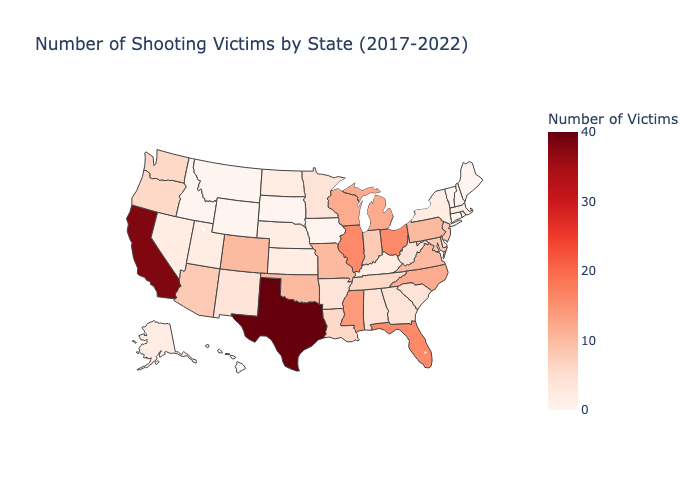

In [30]:
state_victims_fig = go.Figure(data=go.Choropleth(locations=state_victims.index, 
                                                 z=state_victims['2017-2022'], 
                                                 locationmode='USA-states', 
                                                 colorscale='Reds',
                                                 colorbar_title='Number of Victims'))

state_victims_fig.update_layout(title_text='Number of Shooting Victims by State (2017-2022)', 
                                geo_scope='usa')

img_bytes = state_victims_fig.to_image(format='png')
Image(img_bytes)

# Shooting Victims Killed by State (2017-2022)

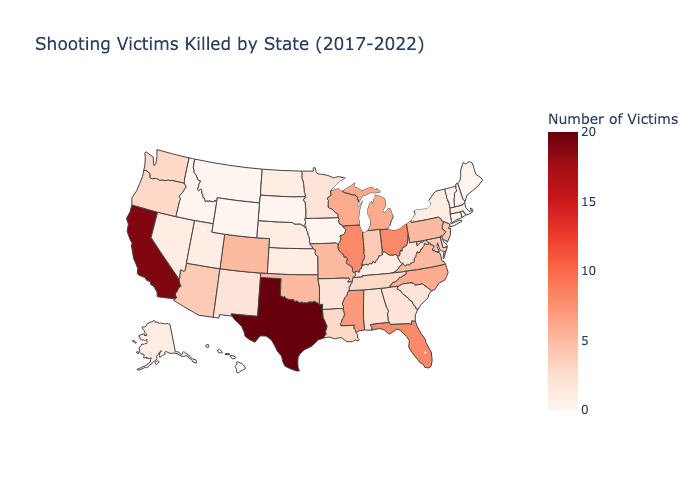

In [31]:
victims_killed_fig = go.Figure(data=go.Choropleth(locations=victims_killed.index, 
                                                  z=victims_killed['2017-2022'], 
                                                  locationmode='USA-states', 
                                                  colorscale='Reds',
                                                  colorbar_title='Number of Victims'))

victims_killed_fig.update_layout(title_text='Shooting Victims Killed by State (2017-2022)', 
                                 geo_scope='usa')

img_bytes = victims_killed_fig.to_image(format='png')
Image(img_bytes)

# Shooting Victims Injured by State (2017-2022)

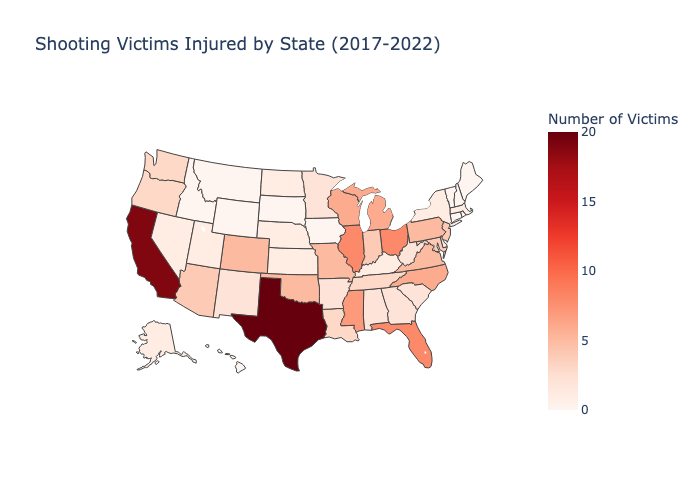

In [32]:
victims_injured_fig = go.Figure(data=go.Choropleth(locations=victims_injured.index, 
                                                   z=victims_injured['2017-2022'], 
                                                   locationmode='USA-states', 
                                                   colorscale='Reds',
                                                   colorbar_title='Number of Victims'))

victims_injured_fig.update_layout(title_text='Shooting Victims Injured by State (2017-2022)', 
                                  geo_scope='usa')

img_bytes = victims_injured_fig.to_image(format='png')
Image(img_bytes)

# Guns by State

In [33]:
types = pd.read_csv('../data/types.csv', header=[0, 1], index_col=0)
types.head()

2017                                              \
0                  ALABAMA ALASKA ARIZONA ARKANSAS CALIFORNIA COLORADO   
TYPES                                                                    
Any Other Weapon       2.0    0.0    28.0      0.0        6.0      6.0   
Combination            5.0    1.0     2.0      1.0       12.0      3.0   
Derringer             47.0    5.0    35.0     12.0      265.0     23.0   
Destructive Device     1.0    0.0     3.0      0.0        5.0      0.0   
Flare Gun              0.0    0.0     2.0      0.0        1.0      0.0   

                                                                      ...  \
0                  CONNECTICUT DELAWARE DISTRICT OF COLUMBIA FLORIDA  ...   
TYPES                                                                 ...   
Any Other Weapon           0.0      0.0                  0.0     5.0  ...   
Combination                2.0      0.0                  0.0     9.0  ...   
Derringer                  9.0      4.0                  8.0   141.0  ...   
Destructive Device         0.0      1.0                  0.0     3.0  ...   
Flare Gun                  1.0      0.0                  1.0     1.0  ...   

                    2022                                                     \
0                  TEXAS US VIRGIN ISLANDS UTAH VERMONT VIRGINIA WASHINGTON   
TYPES                                                                         
Any Other Weapon     NaN               NaN  NaN     NaN      NaN        NaN   
Combination          NaN               NaN  NaN     NaN      NaN        NaN   
Derringer            NaN               NaN  NaN     NaN      NaN        NaN   
Destructive Device   NaN               NaN  NaN     NaN      NaN        NaN   
Flare Gun            NaN               NaN  NaN     NaN      NaN        NaN   

                                                          
0                  WEST VIRGINIA WISCONSIN WYOMING TOTAL  
TYPES                                                     
Any Other Weapon             NaN       NaN     NaN   NaN  
Combination                  NaN       NaN     NaN   NaN  
Derringer                    NaN       NaN     NaN   NaN  
Destructive Device           NaN       NaN     NaN   NaN  
Flare Gun                    NaN       NaN     NaN   NaN  

[5 rows x 330 columns]

In [34]:
state_abbreviations = {'Alaska': 'AK',
                       'Alabama': 'AL',
                       'Arkansas': 'AR',
                       'Arizona': 'AZ',
                       'California': 'CA',
                       'Colorado': 'CO',
                       'Connecticut': 'CT',
                       'District Of Columbia': 'DC',
                       'Delaware': 'DE',
                       'Florida': 'FL',
                       'Georgia': 'GA',
                       'Hawaii': 'HI',
                       'Iowa': 'IA',
                       'Idaho': 'ID',
                       'Illinois': 'IL',
                       'Indiana': 'IN',
                       'Kansas': 'KS',
                       'Kentucky': 'KY',
                       'Louisiana': 'LA',
                       'Massachusetts': 'MA',
                       'Maryland': 'MD',
                       'Maine': 'ME',
                       'Michigan': 'MI',
                       'Minnesota': 'MN',
                       'Missouri': 'MO',
                       'Mississippi': 'MS',
                       'Montana': 'MT',
                       'North Carolina': 'NC',
                       'North Dakota': 'ND',
                       'Nebraska': 'NE',
                       'New Hampshire': 'NH',
                       'New Jersey': 'NJ',
                       'New Mexico': 'NM',
                       'Nevada': 'NV',
                       'New York': 'NY',
                       'Ohio': 'OH',
                       'Oklahoma': 'OK',
                       'Oregon': 'OR',
                       'Pennsylvania': 'PA',
                       'Rhode Island': 'RI',
                       'South Carolina': 'SC',
                       'South Dakota': 'SD',
                       'Tennessee': 'TN',
                       'Texas': 'TX',
                       'Utah': 'UT',
                       'Virginia': 'VA',
                       'Vermont': 'VT',
                       'Washington': 'WA',
                       'Wisconsin': 'WI',
                       'West Virginia': 'WV',
                       'Wyoming': 'WY',
                       'Puerto Rico': 'PR',
                       'Us Virgin Islands': 'VI'}

# 2017

In [35]:
guns_2017 = pd.DataFrame(types.loc[:, ['2017']].sum()).reset_index()
guns_2017 = guns_2017.rename(columns={'0': 'state', 0: '2017'})
guns_2017.index = guns_2017['state'].str.title().replace(state_abbreviations)
guns_2017 = guns_2017.drop(columns=['level_0', 'state'])
guns_2017 = guns_2017.drop(['Guam', 'Total'])
guns_2017.head()

,2017
state,
AL,13332.0
AK,2150.0
AZ,13276.0
AR,3050.0
CA,83054.0


# 2018

In [36]:
guns_2018 = pd.DataFrame(types.loc[:, ['2018']].sum()).reset_index()
guns_2018 = guns_2018.rename(columns={'0': 'state', 0: '2018'})
guns_2018.index = guns_2018['state'].str.title().replace(state_abbreviations)
guns_2018 = guns_2018.drop(columns=['level_0', 'state'])
guns_2018 = guns_2018.drop(['Guam', 'Total'])
guns_2018.head()

,2018
state,
AL,13024.0
AK,2020.0
AZ,16502.0
AR,4630.0
CA,84976.0


# 2019

In [37]:
guns_2019 = pd.DataFrame(types.loc[:, ['2019']].sum()).reset_index()
guns_2019 = guns_2019.rename(columns={'0': 'state', 0: '2019'})
guns_2019.index = guns_2019['state'].str.title().replace(state_abbreviations)
guns_2019 = guns_2019.drop(columns=['level_0', 'state'])
guns_2019 = guns_2019.drop(['Guam & Northern Mariana Islands', 'Total'])
guns_2019.head()

,2019
state,
AL,15348.0
AK,2266.0
AZ,17966.0
AR,7032.0
CA,83766.0


# 2020

In [38]:
guns_2020 = pd.DataFrame(types.loc[:, ['2020']].sum()).reset_index()
guns_2020 = guns_2020.rename(columns={'0': 'state', 0: '2020'})
guns_2020.index = guns_2020['state'].str.title().replace(state_abbreviations)
guns_2020 = guns_2020.drop(columns=['level_0', 'state'])
guns_2020 = guns_2020.drop(['Guam & Northern Mariana Islands', 'Total'])
guns_2020.head()

,2020
state,
AL,15840.0
AK,1690.0
AZ,22042.0
AR,6778.0
CA,90492.0


# 2021

In [39]:
guns_2021 = pd.DataFrame(types.loc[:, ['2021']].sum()).reset_index()
guns_2021 = guns_2021.rename(columns={'0': 'state', 0: '2021'})
guns_2021.index = guns_2021['state'].str.title().replace(state_abbreviations)
guns_2021 = guns_2021.drop(columns=['level_0', 'state'])
guns_2021 = guns_2021.drop(['Guam & Northern Mariana Islands', 'Total'])
guns_2021.head()

,2021
state,
AL,17694.0
AK,1594.0
AZ,24226.0
AR,7082.0
CA,108676.0


# 2022

In [40]:
guns_2022 = pd.DataFrame(types.loc[:, ['2022']].sum()).reset_index()
guns_2022 = guns_2022.rename(columns={'0': 'state', 0: '2022'})
guns_2022.index = guns_2022['state'].str.title().replace(state_abbreviations)
guns_2022 = guns_2022.drop(columns=['level_0', 'state'])
guns_2022 = guns_2022.drop(['Guam & Northern Mariana Islands', 'Total'])
guns_2022.head()

,2022
state,
AL,21038.0
AK,2400.0
AZ,28038.0
AR,6988.0
CA,112524.0


# 2017-2022

In [41]:
guns = pd.concat([guns_2017, guns_2018, guns_2019, guns_2020, guns_2021, guns_2022], axis=1)
guns['2017-2022'] = guns.sum(axis=1)
guns.head()

,2017,2018,2019,2020,2021,2022,2017-2022
state,,,,,,,
AL,13332.0,13024.0,15348.0,15840.0,17694.0,21038.0,96276.0
AK,2150.0,2020.0,2266.0,1690.0,1594.0,2400.0,12120.0
AZ,13276.0,16502.0,17966.0,22042.0,24226.0,28038.0,122050.0
AR,3050.0,4630.0,7032.0,6778.0,7082.0,6988.0,35560.0
CA,83054.0,84976.0,83766.0,90492.0,108676.0,112524.0,563488.0


# Number of Guns by State (2017-2022)

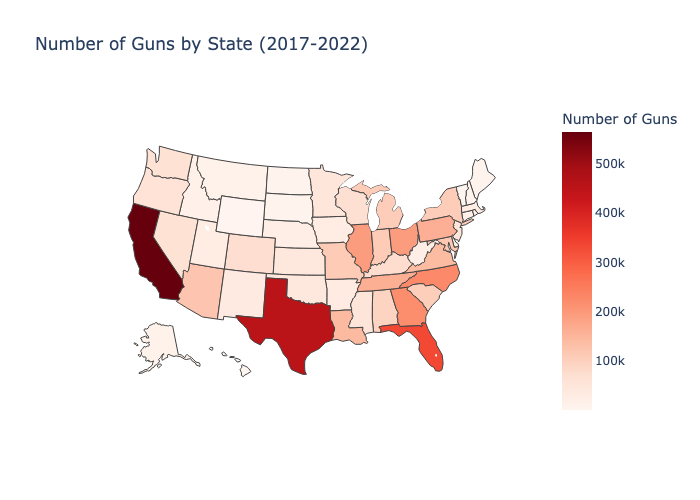

In [42]:
guns_fig = go.Figure(data=go.Choropleth(locations=guns.index, 
                                        z=guns['2017-2022'], 
                                        locationmode='USA-states', 
                                        colorscale='Reds',
                                        colorbar_title='Number of Guns'))

guns_fig.update_layout(title_text='Number of Guns by State (2017-2022)', 
                       geo_scope='usa')

img_bytes = guns_fig.to_image(format='png')
Image(img_bytes)

# States Dashboard

In [43]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1('States'),
              
    html.Div([dcc.Dropdown(['Number of Mass Shootings', 
                            'Number of Shooting Victims', 
                            'Shooting Victims Killed', 
                            'Shooting Victims Injured', 
                            'Number of Guns'], 
                            'Number of Mass Shootings', 
                            id='graph_selection')]),
    
    html.Div([dcc.Dropdown(['2017-2022', '2017', '2018', '2019', '2020', '2021', '2022'], 
                            '2017-2022', id='year_selection')]),
        
    html.Div([dcc.Graph(figure=state_incidents_fig, id='graph')])
])

@callback(
    Output('graph', 'figure'),
    Input('graph_selection', 'value'), 
    Input('year_selection', 'value'))

def update_graph(graph, year):
    if graph == 'Number of Mass Shootings':
        state_incidents_fig = go.Figure(data=go.Choropleth(locations=state_incidents.index, 
                                                   z=state_incidents[year], 
                                                   locationmode='USA-states', 
                                                   colorscale='Reds',
                                                   colorbar_title='Number of Shootings'))
        state_incidents_fig.update_layout(title_text='Number of Mass Shootings by State (' + year + ')', 
                                  geo_scope='usa')
        fig = state_incidents_fig
    
    if graph == 'Number of Shooting Victims':
        state_victims_fig = go.Figure(data=go.Choropleth(locations=state_victims.index, 
                                                 z=state_victims[year], 
                                                 locationmode='USA-states', 
                                                 colorscale='Reds',
                                                 colorbar_title='Number of Victims'))
        state_victims_fig.update_layout(title_text='Number of Shooting Victims by State (' + year + ')', 
                                geo_scope='usa')
        fig = state_victims_fig
        
    if graph == 'Shooting Victims Killed':
        victims_killed_fig = go.Figure(data=go.Choropleth(locations=victims_killed.index, 
                                                  z=victims_killed[year], 
                                                  locationmode='USA-states', 
                                                  colorscale='Reds',
                                                  colorbar_title='Number of Victims'))
        victims_killed_fig.update_layout(title_text='Shooting Victims Killed by State (' + year + ')', 
                                 geo_scope='usa')
        fig = victims_killed_fig
        
    if graph == 'Shooting Victims Injured':
        victims_injured_fig = go.Figure(data=go.Choropleth(locations=victims_injured.index, 
                                                   z=victims_injured[year], 
                                                   locationmode='USA-states', 
                                                   colorscale='Reds',
                                                   colorbar_title='Number of Victims'))
        victims_injured_fig.update_layout(title_text='Shooting Victims Injured by State (' + year + ')', 
                                  geo_scope='usa')
        fig = victims_injured_fig
        
    if graph == 'Number of Guns':
        guns_fig = go.Figure(data=go.Choropleth(locations=guns.index, 
                                        z=guns[year], 
                                        locationmode='USA-states', 
                                        colorscale='Reds',
                                        colorbar_title='Number of Guns'))

        guns_fig.update_layout(title_text='Number of Guns by State (' + year + ')', 
                       geo_scope='usa')
        fig = guns_fig

    return fig

app.run(jupyter_mode='tab')

Dash app running on http://127.0.0.1:8050/


<IPython.core.display.Javascript object>